In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests,csv

import xlrd
import xlwt

from urllib import urlopen, quote

import json
import urllib2
import sys

from pyecharts import Geo
import pickle
%load_ext autoreload
%autoreload 2
# reload(sys)
# sys.setdefaultencoding('utf-8')

In [4]:
cinema = xlrd.open_workbook('E:/MoiveData/treatment/new_cinema_movietype.xls')    

In [5]:
def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'hatbvFb8awXC88SSZqf0N9k92mCk44c0'
    add = quote(address) 
    uri = url + '?' + 'address=' + add  + '&output=' + output + '&ak=' + ak
    req = urlopen(uri)
    res = req.read().decode('utf8') 
    temp = json.loads(res)
    if not temp.has_key('result'):
        print address
        return [0,0]
    lat=temp['result']['location']['lat']
    lng=temp['result']['location']['lng']
    return [lng,lat]

In [6]:
type1 = cinema.sheet_by_index(4)
print type1.name
print len(type1.col(4))
print (type1.col(5)[1].value)
print (type1.col(4)[1].value)
print (type1.col(3)[1].value)
print (type1.col(1)[1].value)

4动作
1963
海淀区
北京市海淀区复兴路69号卓展购物中心5层东侧
北京耀莱成龙国际影城（五棵松店）
144401140.0


In [19]:
value4cinema = {} #影院的票房

for i in range(1, len(type1.col(4))):
    value4cinema[type1.col(4)[i].value]= int(type1.col(1)[i].value)

In [7]:
geo4cinema = {} #影院经纬度
tot = len(type1.col(4))
print tot
for i in range(len(type1.col(4))):
    if (i+1) % 400 == 0: #处理的一个进度条表示80个数据就会输出百分比；
        print i*1.0/tot
    geo4cinema[type1.col(3)[i].value] = getlnglat(type1.col(3)[i].value.encode('utf8'))

1963
CinemaName
金逸天津IMAX大悦城店
CGV星聚汇影城（大连东港店）
保利万和国际影城苹果园店
星美国际影城成都大悦城店
东影时代影城（水悦城店）
恒大影城（翡翠华庭店）
大地数字影院-东圃奥体高德
金逸无锡中桥店
大地影院下沙银泰STAR MAX店
0.203260315843
橙天嘉禾影城苏州印象城店


IOError: [Errno socket error] [Errno 10054] 

In [30]:
print geo4cinema

TypeError: unhashable type

In [8]:
#print geo4cinema

file = open(r'E:/MoiveData/treatment/point.json','w')
    for i in range(len(type1.col(4))):
        str_temp = '{"cinemaname":'+ str(type1.col(3)[i].value)+ '"lng_lat":' + str(geo4cinema[type1.col(3)[i].value]) +'},'
        file.write(str_temp)
        print str_temp
file.close() 

IndentationError: unexpected indent (<ipython-input-8-b67ea42c09c4>, line 4)

In [22]:
getlnglat('成都市成华区双庆路8号万象城四层')

[106.46386780693102, 29.5391289760506]

(array([  97.,  282.,  200.,  139.,   79.,   70.,   41.,   25.,   13.,
          12.,    6.,    6.,    3.,    3.,    0.,    1.,    0.,    0.,
           0.,    1.]),
 array([  1.50689760e+07,   2.15355842e+07,   2.80021924e+07,
          3.44688006e+07,   4.09354088e+07,   4.74020170e+07,
          5.38686252e+07,   6.03352334e+07,   6.68018416e+07,
          7.32684498e+07,   7.97350580e+07,   8.62016662e+07,
          9.26682744e+07,   9.91348826e+07,   1.05601491e+08,
          1.12068099e+08,   1.18534707e+08,   1.25001315e+08,
          1.31467924e+08,   1.37934532e+08,   1.44401140e+08]),
 <a list of 20 Patch objects>)

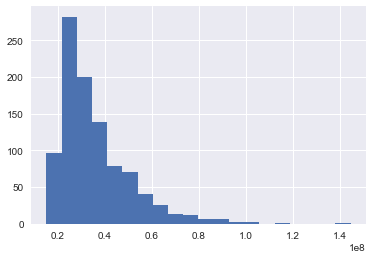

In [19]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

%matplotlib inline

plt.hist([value4cinema[type1.col(4)[i].value] for i in range(1,len(geo4cinema.keys()))],bins = 20)


In [22]:
geo = Geo("全国影院放映电影票房分布", "纪录片", title_color="#fff", title_pos="center",
          width=1200, height=600, background_color='#404a59')
#attr, value = geo.cast(data)
geo.add("", geo4cinema.keys()[:-1],
        [value4cinema[type1.col(4)[i].value] for i in range(1,len(geo4cinema.keys()))],
        type="heatmap", is_visualmap=True, visual_range=[100000, 10000000],
        visual_text_color='#556377',
        geo_cities_coords=geo4cinema)
geo.render('heatmap_cinema_4.html')

In [23]:
import random
geo = Geo( "全国影院分布信息", "纪录片",title_color="#fff", title_pos="center",
          width=1200, height=600, background_color='#404a59')
geo.add("", geo4cinema.keys()[:-1],
        [value4cinema[type1.col(4)[i].value] for i in range(1,len(geo4cinema.keys()))],
        visual_range=[100000, 10000000], visual_text_color="#fff", symbol_size=15, is_visualmap=True, #range表示的是high值。
        geo_cities_coords=geo4cinema)
geo.render('view_cinema_4.html') #文件名啦！

# 得到经纬度的json文件

In [5]:
def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'hatbvFb8awXC88SSZqf0N9k92mCk44c0'
    add = quote(address) 
    uri = url + '?' + 'address=' + add  + '&output=' + output + '&ak=' + ak
    req = urlopen(uri)
    res = req.read().decode('utf8') 
    temp = json.loads(res)
    if not temp.has_key('result'):
        print address
        return [0,0]
    lat=temp['result']['location']['lat']
    lng=temp['result']['location']['lng']
    return [lng,lat]

In [15]:
def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'hatbvFb8awXC88SSZqf0N9k92mCk44c0'
    add = quote(address) 
    uri = url + '?' + 'address=' + add  + '&output=' + output + '&ak=' + ak
    req = urlopen(uri)
    res = req.read() 
    temp = json.loads(res)
    if not temp.has_key('result'):
        print address
        return [0,0]
    return temp

In [4]:
sheet = cinema.sheet_by_index(0)

In [17]:
file = open(r'E:/MoiveData/treatment/point.json','w')
with open('E:/MoiveData/treatment/data1.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        print line
        if reader.line_num == 0:
            continue
        b = line[1].strip()   
        c = line[0].strip()
        lng = getlnglat(b)['result']['location']['lng']
        lat = getlnglat(b)['result']['location']['lat'] 
        str_temp = '{"cinemaname":'+ str(b)+ ',"lat":' + str(lat) + ',"lng":' + str(lng) + ',"count":' + str(c) +'},'
        file.write(str_temp)
        print str_temp
file.close() 

['32989143', '\xb1\xb1\xbe\xa9\xd2\xab\xc0\xb3\xb3\xc9\xc1\xfa\xb9\xfa\xbc\xca\xd3\xb0\xb3\xc7\xa3\xa8\xce\xe5\xbf\xc3\xcb\xc9\xb5\xea\xa3\xa9']
{"cinemaname":����ҫ����������Ӱ�ǣ�����ɵ꣩,"lat":39.9161322666,"lng":116.277952442,"count":32989143},
['24796300', '\xc3\xc0\xbc\xce\xbb\xb6\xc0\xd6\xd3\xb0\xb3\xc7\xc8\xfd\xc0\xef\xcd\xcd\xb5\xea']
{"cinemaname":���λ���Ӱ�������͵�,"lat":39.9402675777,"lng":116.461336918,"count":24796300},
['24192661', '\xc3\xc0\xbc\xce\xbb\xb6\xc0\xd6\xd3\xb0\xb3\xc7\xd6\xd0\xb9\xd8\xb4\xe5\xb5\xea']
{"cinemaname":���λ���Ӱ���йش��,"lat":39.9887246419,"lng":116.320201389,"count":24192661},
['23629810', 'UME\xb9\xfa\xbc\xca\xd3\xb0\xb3\xc7\xa3\xa8\xbb\xaa\xd0\xc7\xb5\xea\xa3\xa9']
{"cinemaname":UME����Ӱ�ǣ����ǵ꣩,"lat":29.5158380105,"lng":106.524303127,"count":23629810},
['23091930', '\xd0\xc7\xc3\xc0\xb9\xfa\xbc\xca\xd3\xb0\xb3\xc7\xa1\xa4\xbd\xf0\xd4\xb4\xb5\xea']
{"cinemaname":��������Ӱ�ǡ���Դ��,"lat":39.9644573195,"lng":116.297571276,"count":23091930},
['23050361',

TypeError: list indices must be integers, not str